In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msno

%matplotlib inline





In [2]:
data = pd.read_csv("/content/Car_sale_ads.csv", engine="python", error_bad_lines= False)
pd.set_option('display.max_columns',None)
data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,145.0,1400.0,Gasoline,NaN,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,165.0,1368.0,Gasoline,NaN,NaN,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,173.0,1301.0,Gasoline,NaN,NaN,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,70.0,2120.0,Gasoline,NaN,Rear wheels,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,60.0,2120.0,Gasoline,NaN,NaN,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,36.0,2200.0,Gasoline,NaN,NaN,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


In [68]:
# we will drop useless columns
df=pd.DataFrame(data)
df.drop(['First_owner','First_registration_date','Offer_location','Offer_publication_date','Currency','Index','Vehicle_version'],axis=1,inplace= True)
df





,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,Features
0,86200,New,Abarth,595,NaN,2021,1.0,145.0,1400.0,Gasoline,NaN,Front wheels,Manual,small_cars,3.0,gray,NaN,[]
1,43500,Used,Abarth,Other,NaN,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,silver,NaN,[]
2,44900,Used,Abarth,500,NaN,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,silver,NaN,"['ABS', 'Electric front windows', 'Drivers air..."
3,39900,Used,Abarth,500,NaN,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,"['ABS', 'Electric front windows', 'Drivers air..."
4,97900,New,Abarth,595,NaN,2021,600.0,165.0,1368.0,Gasoline,NaN,NaN,Manual,small_cars,3.0,blue,NaN,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,39900,Used,Żuk,Other,NaN,2014,40000.0,173.0,1301.0,Gasoline,NaN,NaN,Manual,small_cars,1.0,other,NaN,[]
208300,10900,Used,Żuk,Other,NaN,1970,63518.0,70.0,2120.0,Gasoline,NaN,Rear wheels,Manual,station_wagon,4.0,other,Poland,[]
208301,6900,Used,Żuk,Other,NaN,1977,11880.0,60.0,2120.0,Gasoline,NaN,NaN,Manual,SUV,3.0,red,NaN,[]
208302,5700,Used,Żuk,Other,NaN,1986,100000.0,36.0,2200.0,Gasoline,NaN,NaN,Manual,minivan,2.0,blue,NaN,[]


In [71]:
df['CO2_emissions'].fillna(int(df['CO2_emissions'].median()), inplace=True)


,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,Features
0,86200,New,Abarth,595,NaN,2021,1.0,145.0,1400.0,Gasoline,140.0,Front wheels,Manual,small_cars,3.0,gray,NaN,[]
1,43500,Used,Abarth,Other,NaN,1974,59000.0,75.0,1100.0,Gasoline,140.0,Front wheels,Manual,coupe,2.0,silver,NaN,[]
2,44900,Used,Abarth,500,NaN,2018,52000.0,180.0,1368.0,Gasoline,140.0,NaN,Automatic,small_cars,3.0,silver,NaN,"['ABS', 'Electric front windows', 'Drivers air..."
3,39900,Used,Abarth,500,NaN,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,"['ABS', 'Electric front windows', 'Drivers air..."
4,97900,New,Abarth,595,NaN,2021,600.0,165.0,1368.0,Gasoline,140.0,NaN,Manual,small_cars,3.0,blue,NaN,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,39900,Used,Żuk,Other,NaN,2014,40000.0,173.0,1301.0,Gasoline,140.0,NaN,Manual,small_cars,1.0,other,NaN,[]
208300,10900,Used,Żuk,Other,NaN,1970,63518.0,70.0,2120.0,Gasoline,140.0,Rear wheels,Manual,station_wagon,4.0,other,Poland,[]
208301,6900,Used,Żuk,Other,NaN,1977,11880.0,60.0,2120.0,Gasoline,140.0,NaN,Manual,SUV,3.0,red,NaN,[]
208302,5700,Used,Żuk,Other,NaN,1986,100000.0,36.0,2200.0,Gasoline,140.0,NaN,Manual,minivan,2.0,blue,NaN,[]


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', inplace=True)
missing_value_data
#i wanted to know which columns have many null values instead of looking at each column


In [34]:
prices=df.groupby(['Vehicle_brand'])['Price'].mean().astype(int).sort_values()[41:]
prices
#average price for all brands to choose the most expensive  cars for my visualizations


Vehicle_brand
Lexus              100192
Audi               103592
BMW                105183
Isuzu              111212
Jeep               117319
DFSK               118241
Mercedes-Benz      120970
Tesla              121450
Jaguar             126321
DS Automobiles     140767
GMC                159000
Cupra              191454
Land Rover         191688
Maserati           204417
Lotus              249000
Porsche            250441
Alpine             310448
RAM                334021
Aston Martin       444364
Ferrari            498013
Lamborghini        575190
Bentley            711015
McLaren            819451
Rolls-Royce       1597949
Name: Price, dtype: int64

In [ ]:
prices2=df.groupby(['Vehicle_brand'])['Price'].mean().astype(int).sort_values()[:60]
prices2

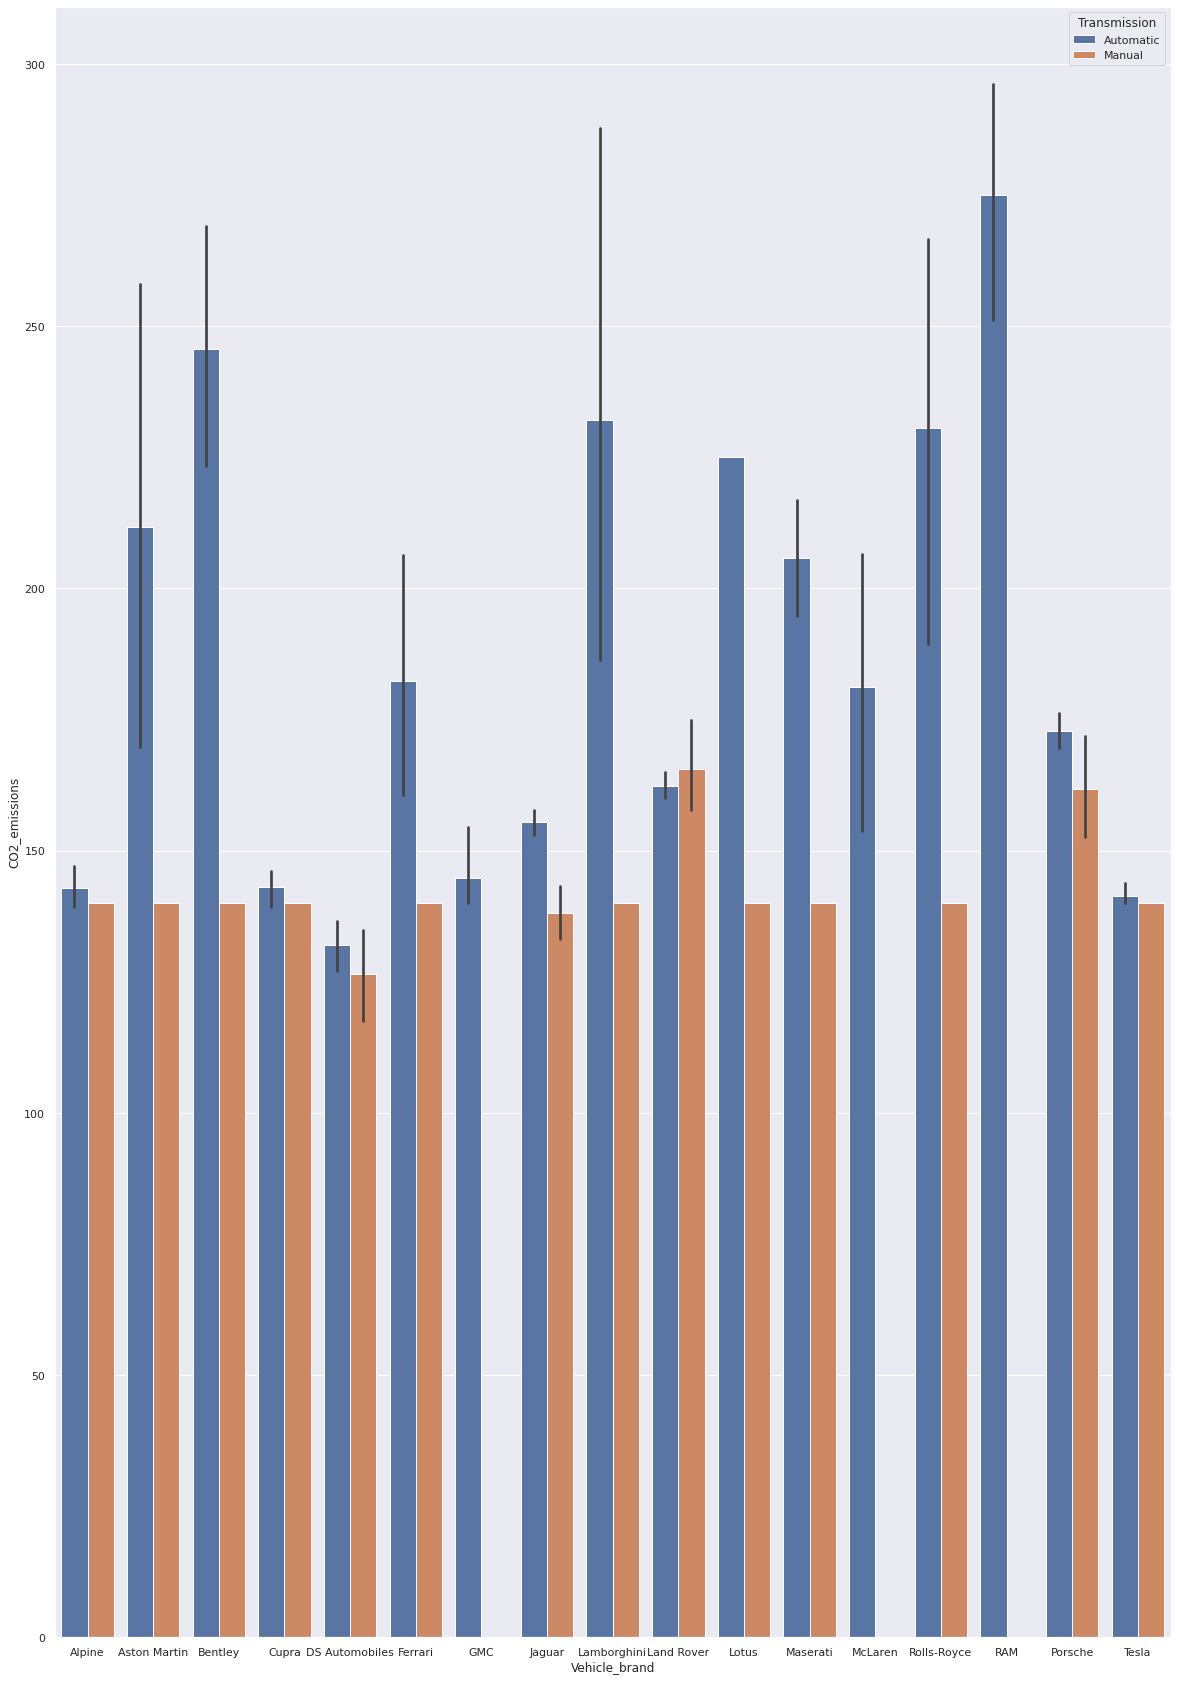

In [74]:
#do high priced cars have low co2 emissions?
brand=df[(df['Vehicle_brand']== 'Tesla')|(df['Vehicle_brand']=='Jaguar')|(df['Vehicle_brand']=='DS Automobiles')|(df['Vehicle_brand']=='GMC')
|(df['Vehicle_brand']=='Cupra')|(df['Vehicle_brand']=='Land Rover')|(df['Vehicle_brand']=='Maserati')|(df['Vehicle_brand']=='Lotus')|(df['Vehicle_brand']=='Porsche')
|(df['Vehicle_brand']=='Alpine')|(df['Vehicle_brand']=='RAM')|(df['Vehicle_brand']=='Aston Martin')|(df['Vehicle_brand']=='Ferrari')|(df['Vehicle_brand']=='Lamborghini')
|(df['Vehicle_brand']=='Bentley')|(df['Vehicle_brand']=='McLaren')|(df['Vehicle_brand']=='Rolls-Royce')]
sns.set(rc={'figure.figsize':(20,30)})
sns.barplot(x='Vehicle_brand',y='CO2_emissions',hue='Transmission',data=brand)
#co2 emissions are between 150 and 300 


In [84]:
#do low priced cars have higher co2 emissions than low priced cars?
brand2=df[(df['Vehicle_brand']== 'Tavria')|(df['Vehicle_brand']== 'Grecav')|(df['Vehicle_brand']== 'Rover')|(df['Vehicle_brand']== 'Vauxhall')|(df['Vehicle_brand']== 'Polonez')|(df['Vehicle_brand']== 'Daihatsu')|(df['Vehicle_brand']== 'Talbot')|(df['Vehicle_brand']== 'Tata')|(df['Vehicle_brand']== 'Scion')|(df['Vehicle_brand']== 'Zastava')|(df['Vehicle_brand']== 'Trabant')|(df['Vehicle_brand']== 'Casalini')|(df['Vehicle_brand']== 'Nysa')|(df['Vehicle_brand']== 'Żuk')|(df['Vehicle_brand']== 'Moskwicz')|(df['Vehicle_brand']== 'Wartburg')|(df['Vehicle_brand']== 'Saab')
sns.set(rc={'figure.figsize':(20,30)})
sns.barplot(x='Vehicle_brand',y='CO2_emissions',hue='Transmission',data=brand2)


#typically low priced cars all have co2 emmissions  but range from 100 to 200 and their transmission is manual and few are automatic
#their  co2 emission range is lower than high priced cars range


SyntaxError: ignored

In [9]:
#i removed the rows which has the origin countries = null 
df3=df.dropna(subset=['Origin_country'])
df3

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,Features
5,62950,Used,Abarth,595,NaN,2016,46060.0,180.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,Germany,"['ABS', 'Electric front windows', 'Drivers air..."
7,69900,Used,Abarth,500,NaN,2019,20000.0,145.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,white,Poland,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
18,70900,Used,Abarth,595,NaN,2019,11000.0,145.0,1368.0,Gasoline,154.0,Front wheels,Manual,small_cars,2.0,yellow,Poland,"['ABS', 'Electric front windows', 'Drivers air..."
20,75500,Used,Abarth,595,NaN,2019,6500.0,180.0,1368.0,Gasoline,171.0,Front wheels,Manual,city_cars,3.0,black,Germany,"['ABS', 'Electric front windows', 'Drivers air..."
35,69500,Used,Abarth,595,NaN,2017,16400.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,Poland,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208229,54800,Used,Volvo,V40,II (2012-),2014,158000.0,150.0,1984.0,Diesel,137.0,Front wheels,Automatic,coupe,5.0,white,Italy,"['ABS', 'Electric front windows', 'Drivers air..."
208240,67999,Used,Volvo,V40,II (2012-),2018,13110.0,122.0,1969.0,Gasoline,127.0,Front wheels,Manual,compact,5.0,gray,France,"['ABS', 'Electric front windows', 'Drivers air..."
208254,91900,Used,Volvo,V60,NaN,2017,31000.0,245.0,1969.0,Gasoline,153.0,Front wheels,Automatic,station_wagon,5.0,black,Netherlands,"['ABS', 'Electric front windows', 'Drivers air..."
208256,18900,Used,Volvo,V50,NaN,2009,226732.0,109.0,1560.0,Diesel,119.0,Front wheels,Manual,station_wagon,5.0,black,Belgium,"['ABS', 'Electric front windows', 'Drivers air..."


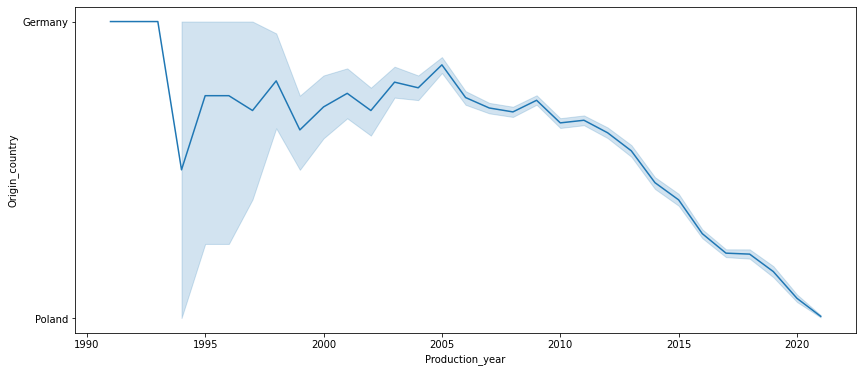

In [10]:
#what are the top countries that export cars
#group by each origin country and observe on the countries with highest production
country=df3.groupby(['Origin_country'])
occur = country.size()
#germany and poland have the highest production count
new=df3[(df3['Origin_country']== 'Germany')|(df3['Origin_country']=='Poland')]

plt.figure(figsize=(14,6))
#throughout the years, how is the production rate for germany and poland
sns.lineplot(x=new['Production_year'],y=new['Origin_country'])
#the rates in both countries decreased throughout the years












/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


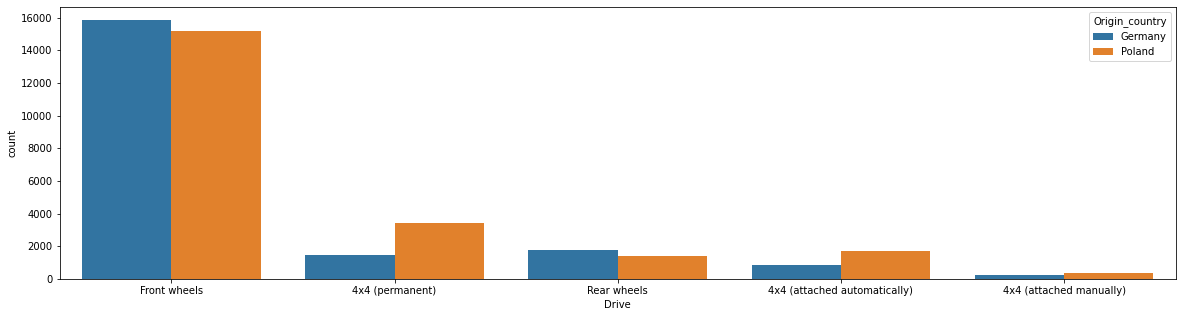

In [11]:
#drive type color brand model doors
#germany=country.get_group('Germany')
#poland=country.get_group('Poland')

#driveg=germany.groupby(['Drive']).size()
#driveg


#fig, ax = plt.subplots(2,3, figsize=(30, 15))
#sns.countplot('Drive', data= driveg, ax=ax[0])
#ax[0].set_ylim([0, 10000])
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.countplot('Drive', hue='Origin_country', data= new, ax=ax)
plt.show()

#sns.countplot('month', hue='target', data= train, ax=ax[1])
#ax[1].set_ylim([0, 80000])

#fig.suptitle("features of cars exported by Germany", fontsize=20)
#plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


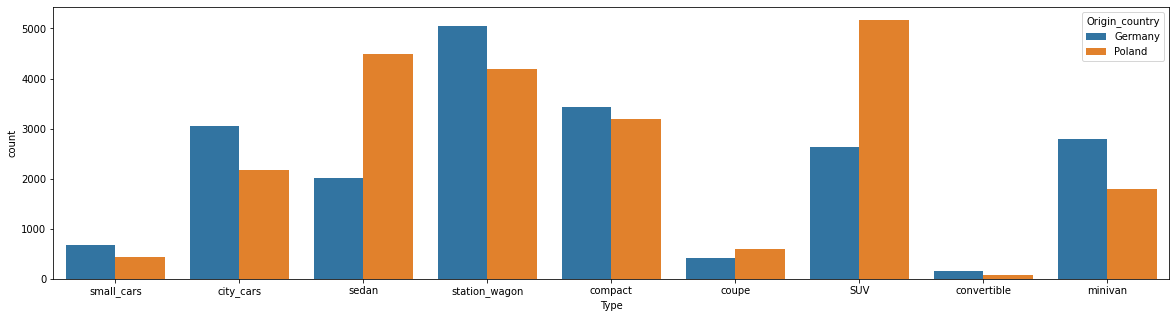

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.countplot('Type', hue='Origin_country', data= new, ax=ax)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


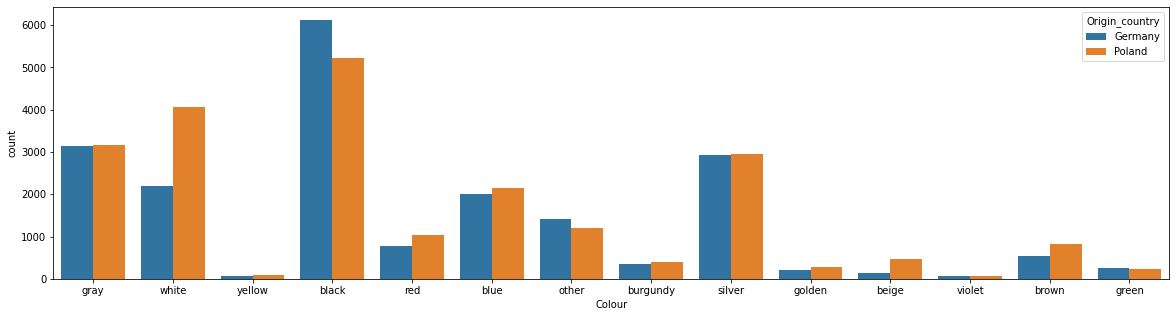

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.countplot('Colour', hue='Origin_country', data= new, ax=ax)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


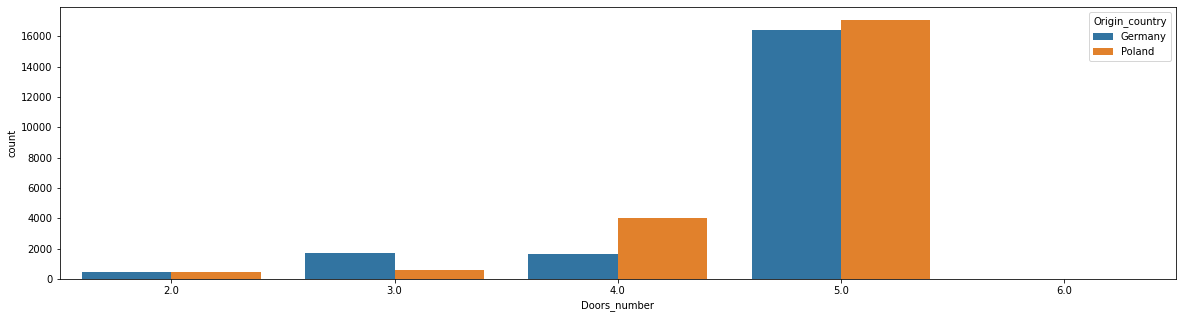

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
sns.countplot('Doors_number', hue='Origin_country', data= new, ax=ax)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


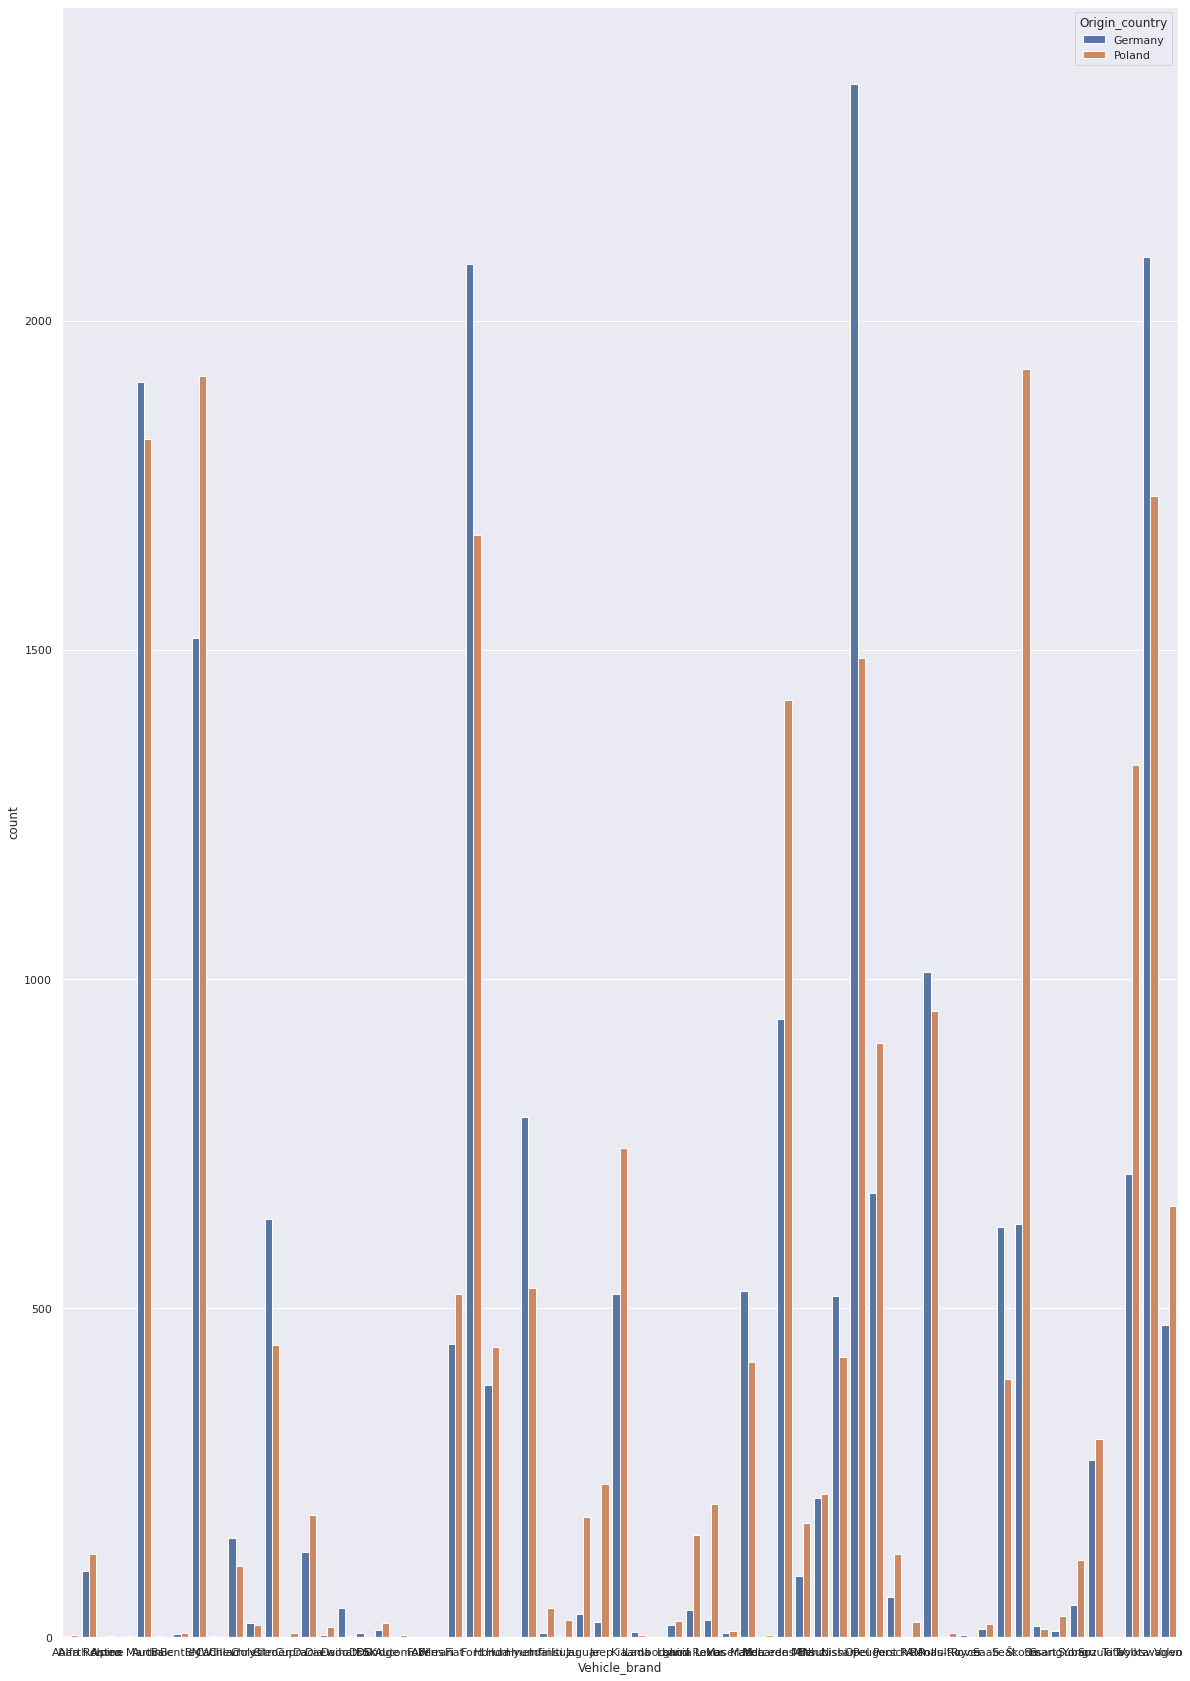

In [76]:
#41

fig, ax = plt.subplots(1,1, figsize=(20, 20))
sns.countplot('Vehicle_brand', hue='Origin_country', data= new, ax=ax)
plt.show()